# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X = pd.read_csv('data/orange_small_churn_data.train.txt')
y = pd.read_csv('data/orange_small_churn_labels.train.txt', header=None, names=['churn'])

2\. Рассчитайте доли классов `отток` и `не отток`.

In [5]:
not_churn, churn = (y['churn'].value_counts() / y['churn'].shape[0])
print('Доля класса "Отток":', churn)
print('Доля класса "Не отток":', not_churn)

Доля класса "Отток": 0.0744
Доля класса "Не отток": 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [6]:
X.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [7]:
# Удаление пустык колонок
print(X.shape)
X.dropna(axis='columns', how='all', inplace=True)
print(X.shape)

(40000, 230)
(40000, 212)


In [8]:
import scipy.stats as sts
    
correlations = {column: sts.pearsonr(X[X[column].notna()][column], y[X[column].notna()]['churn'])[0]
                    for column in X.columns
                    if X[column].dtype in ('float64', 'int64')}
max_corr_columns = sorted(correlations.keys(), key=lambda x: abs(correlations[x]), reverse=True)
print('Признак с максимальной корреляцией: {} = {}'.format(max_corr_columns[0], correlations[max_corr_columns[0]]))
print('Признак с минимальной корреляцией: {} = {}'.format(max_corr_columns[-1], correlations[max_corr_columns[-1]]))

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Признак с максимальной корреляцией: Var168 = -0.13530481183201484
Признак с минимальной корреляцией: Var123 = -0.00011520455912538655


Сильной линейной корреляции между каким-либо признаком и целевой переменной не наблюдается. Однако, корреляция Пирсона работает не очень корректно когда пара признаков имеет разный тип данных.

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


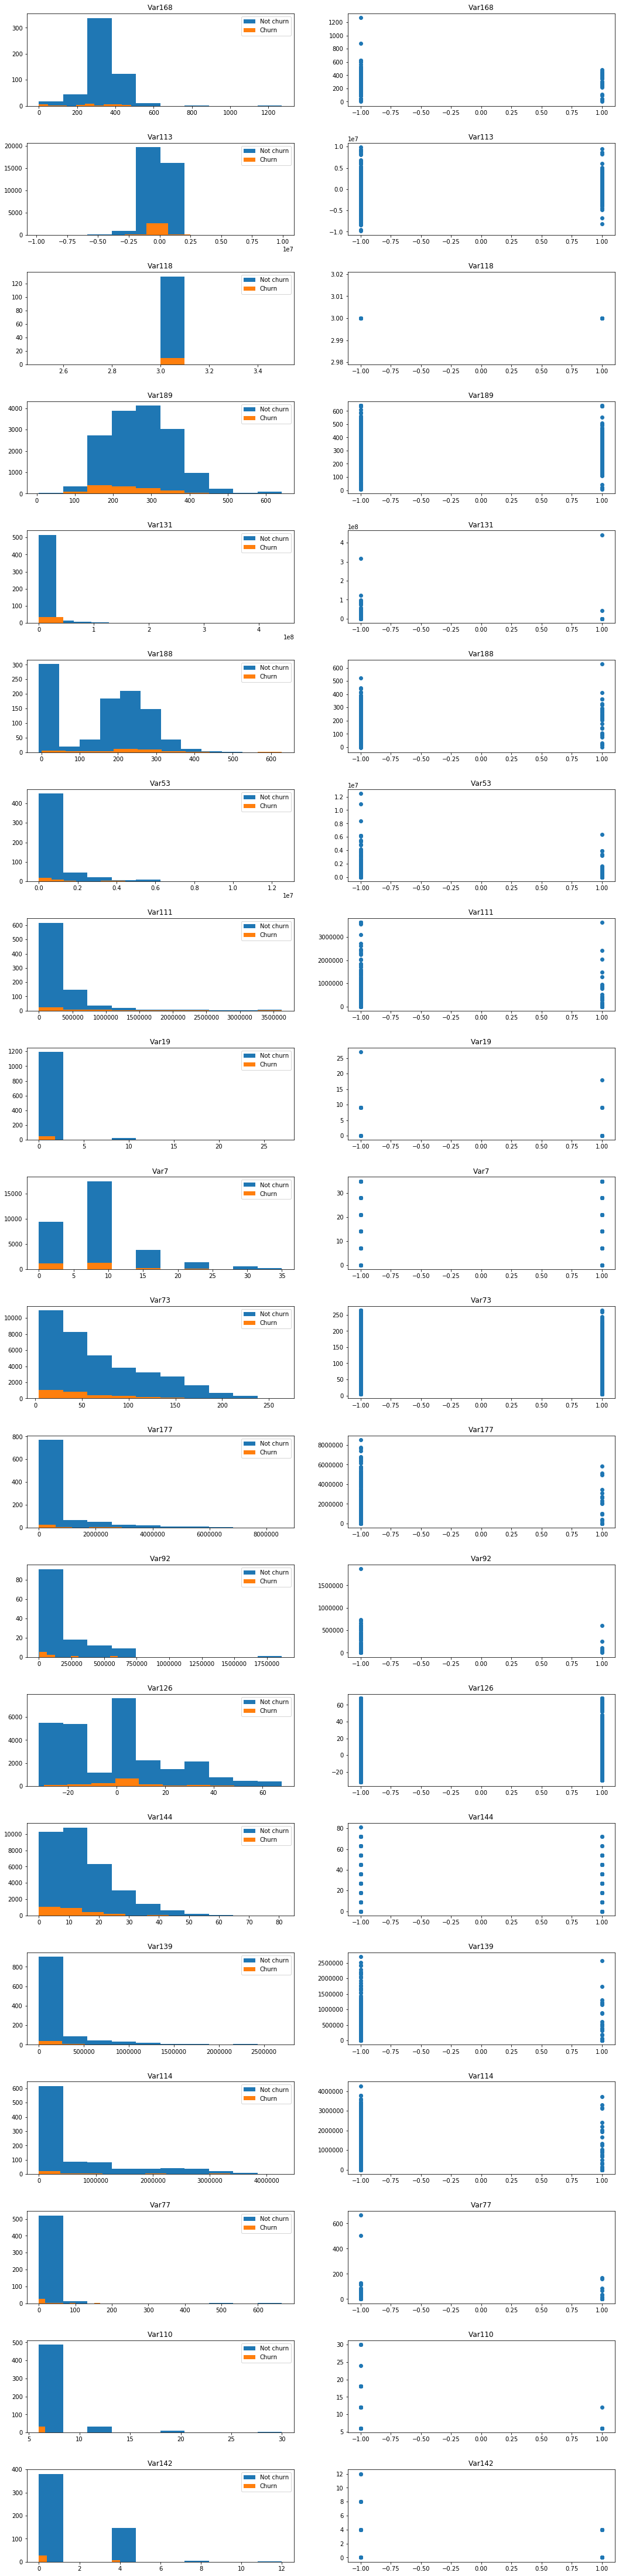

In [9]:
fig, axs = plt.subplots(20, 2)
fig.set_figheight(80)
fig.set_figwidth(18)
fig.subplots_adjust(hspace=0.4)
for ax, column in zip(axs, max_corr_columns[:20]):
    ax[0].set_title(column)
    ax[0].hist(X[y['churn'] == -1][column], bins=10, label=column)
    ax[0].hist(X[y['churn'] == 1][column], bins=10, label=column)
    ax[0].legend(['Not churn', 'Churn'])
    ax[1].set_title(column)
    ax[1].scatter(y['churn'], X[column], label=column)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

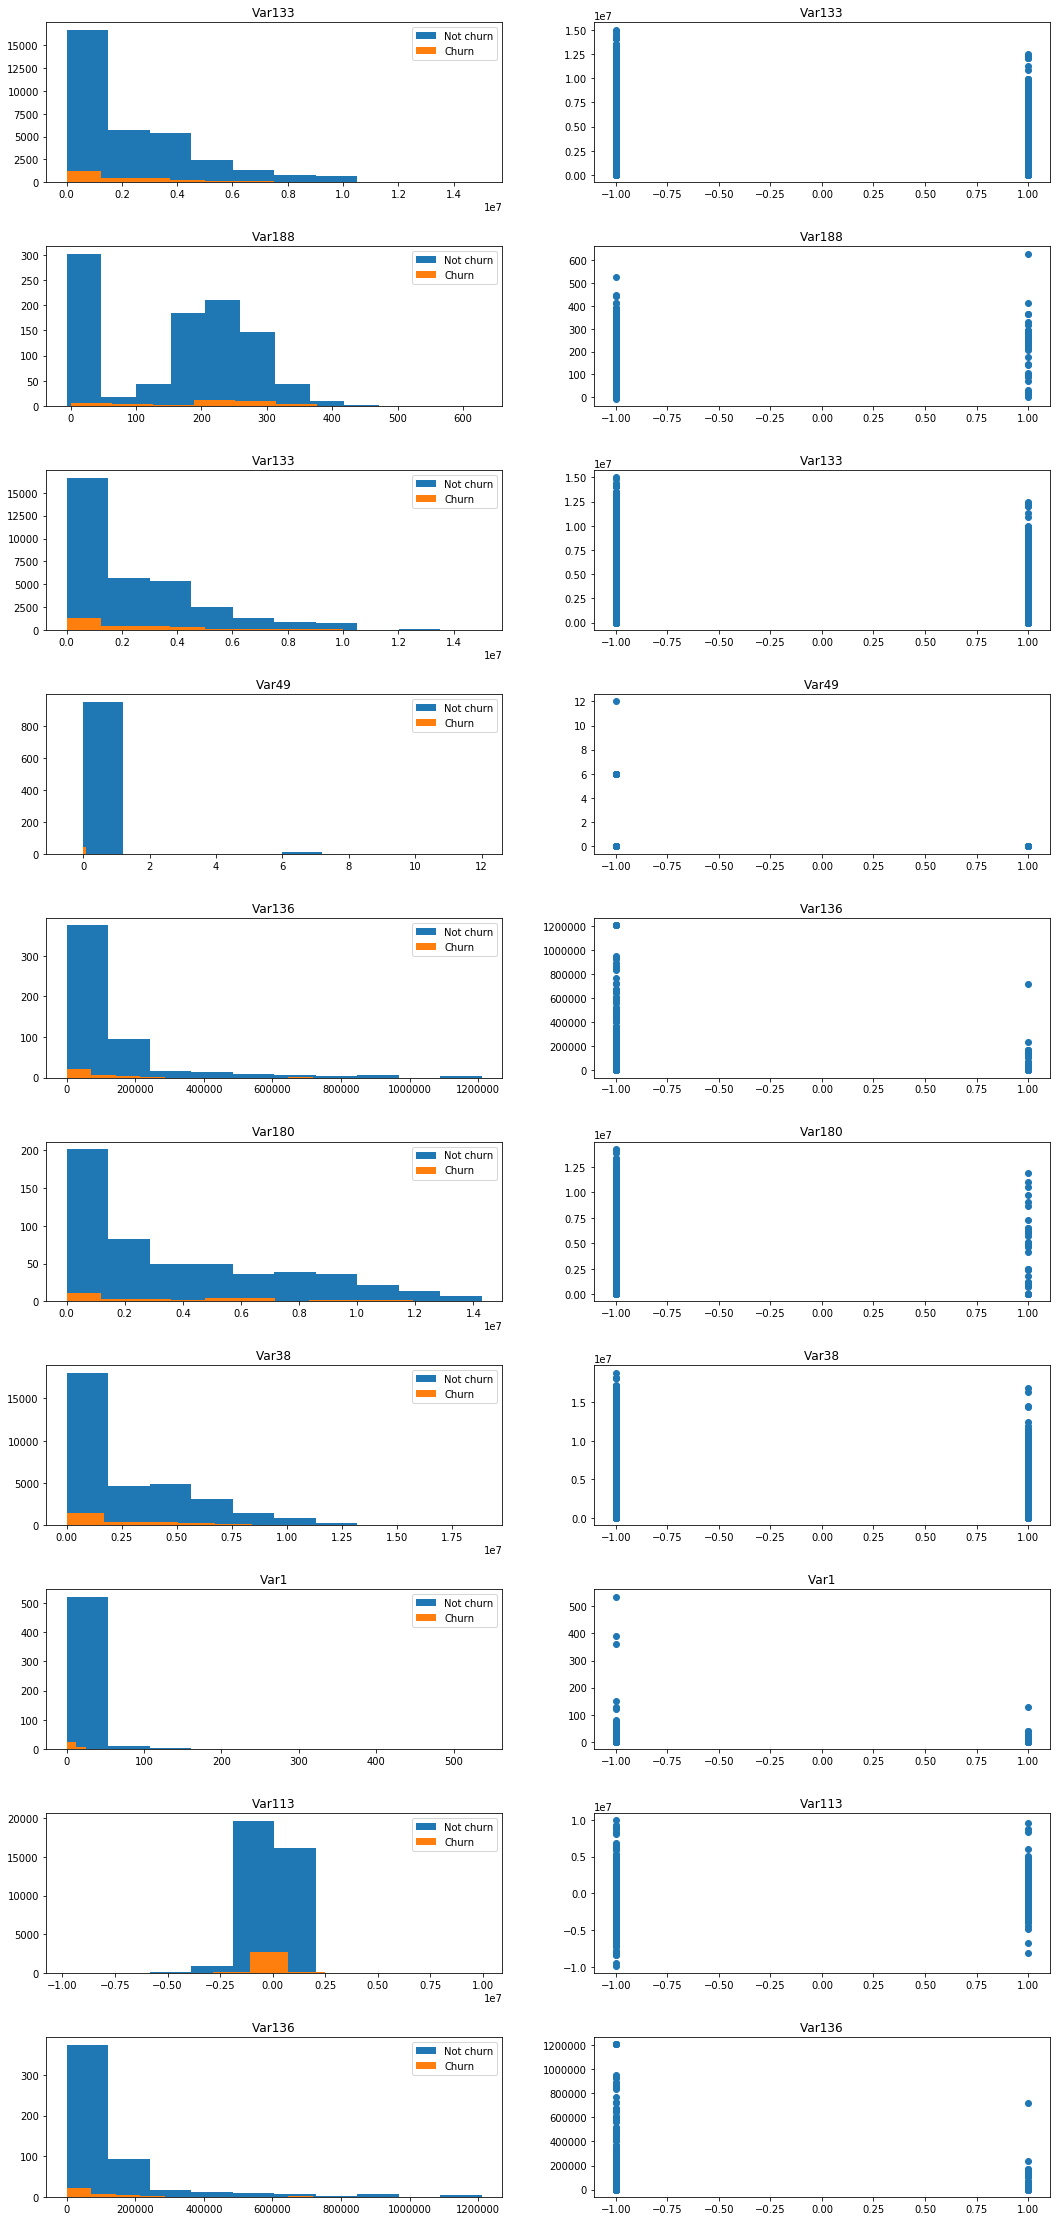

In [10]:
indices = np.random.randint(0, len(max_corr_columns), 10)
rand_columns = [max_corr_columns[ind] for ind in indices]

fig, axs = plt.subplots(10, 2)
fig.set_figheight(40)
fig.set_figwidth(18)
fig.subplots_adjust(hspace=0.4)
for ax, column in zip(axs, rand_columns):
    ax[0].set_title(column)
    ax[0].hist(X[y['churn'] == -1][column], bins=10, label=column)
    ax[0].hist(X[y['churn'] == 1][column], bins=10, label=column)
    ax[0].legend(['Not churn', 'Churn'])
    ax[1].set_title(column)
    ax[1].scatter(y['churn'], X[column], label=column)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

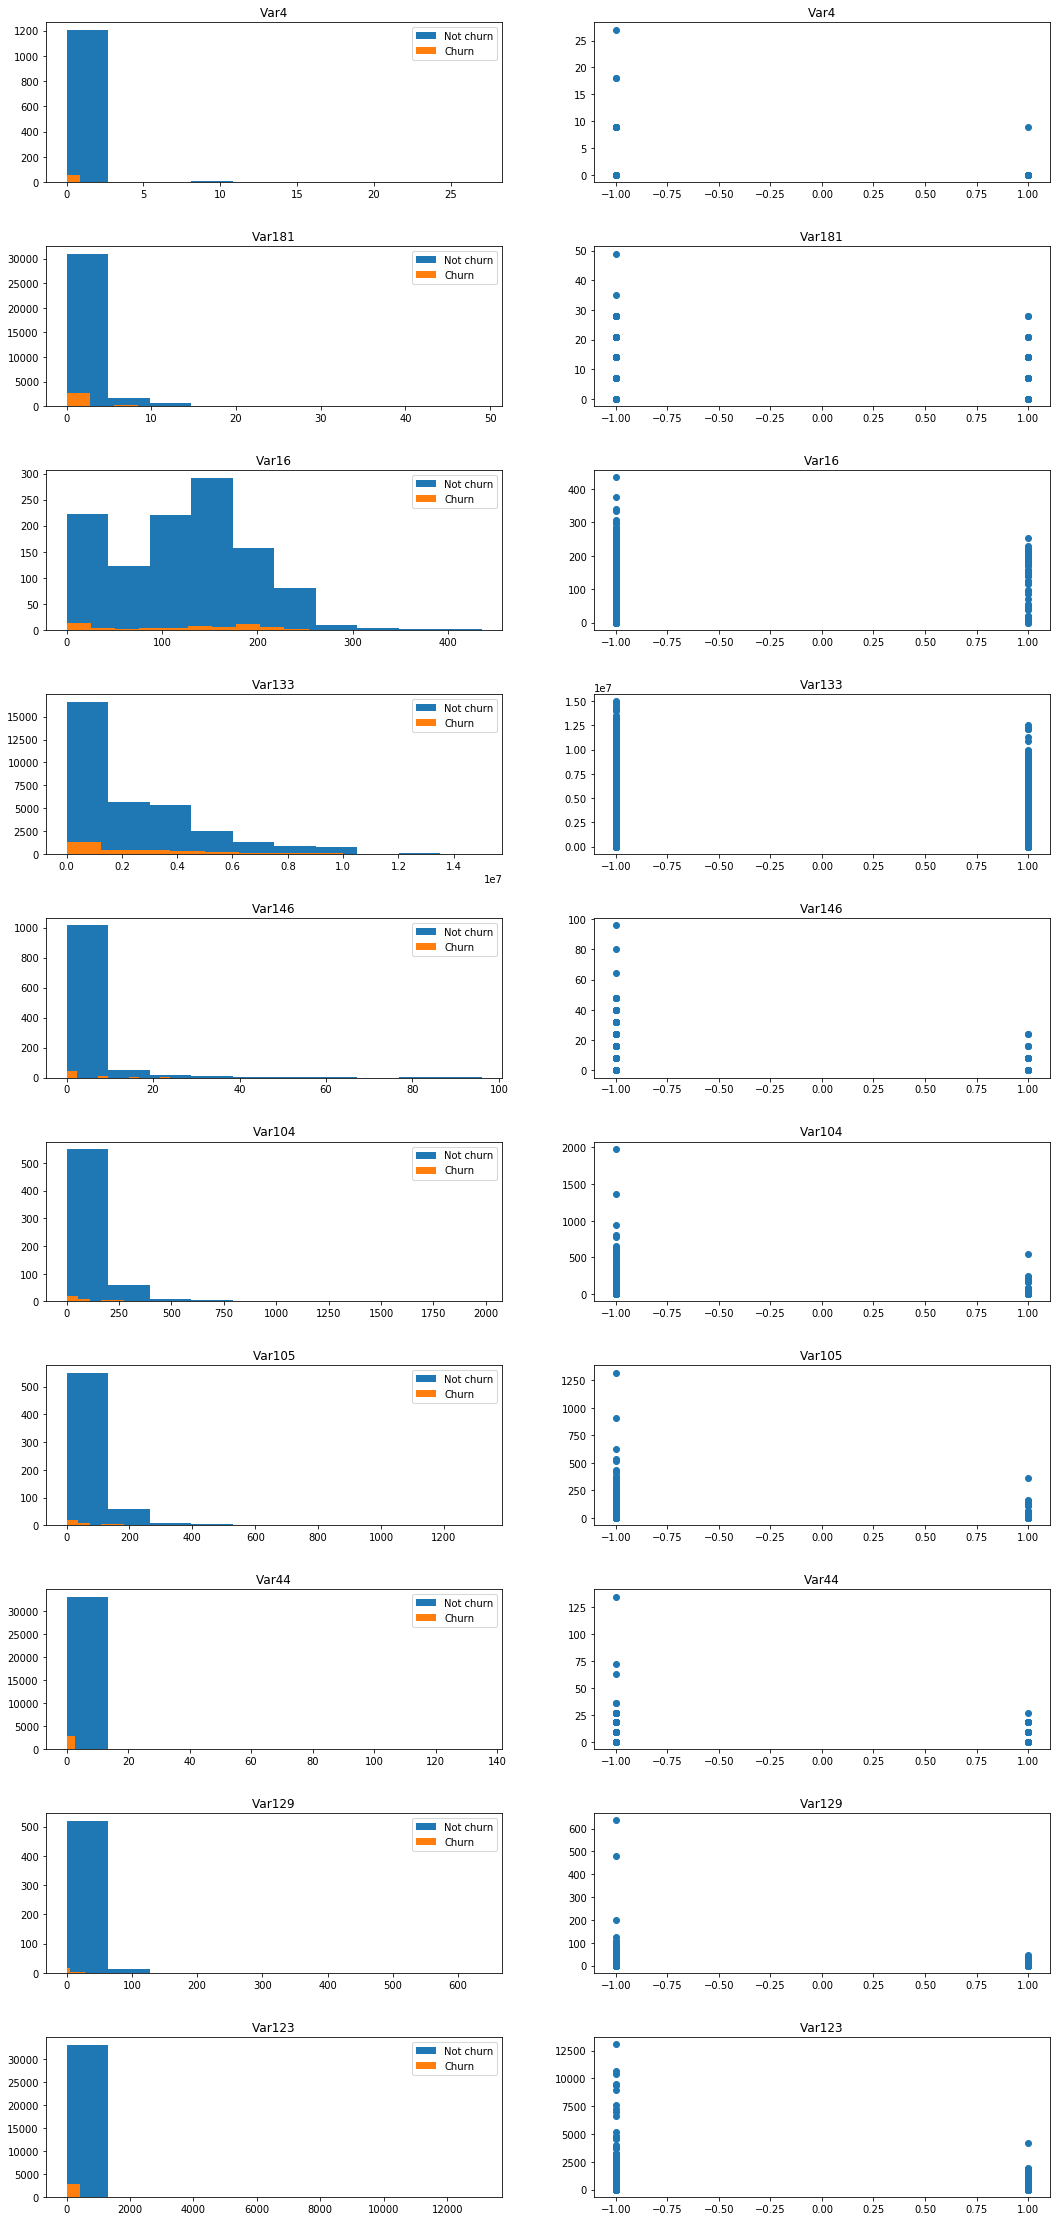

In [11]:
fig, axs = plt.subplots(10, 2)
fig.set_figheight(40)
fig.set_figwidth(18)
fig.subplots_adjust(hspace=0.4)
for ax, column in zip(axs, max_corr_columns[-10:]):
    ax[0].set_title(column)
    ax[0].hist(X[y['churn'] == -1][column], bins=10, label=column)
    ax[0].hist(X[y['churn'] == 1][column], bins=10, label=column)
    ax[0].legend(['Not churn', 'Churn'])
    ax[1].set_title(column)
    ax[1].scatter(y['churn'], X[column], label=column)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

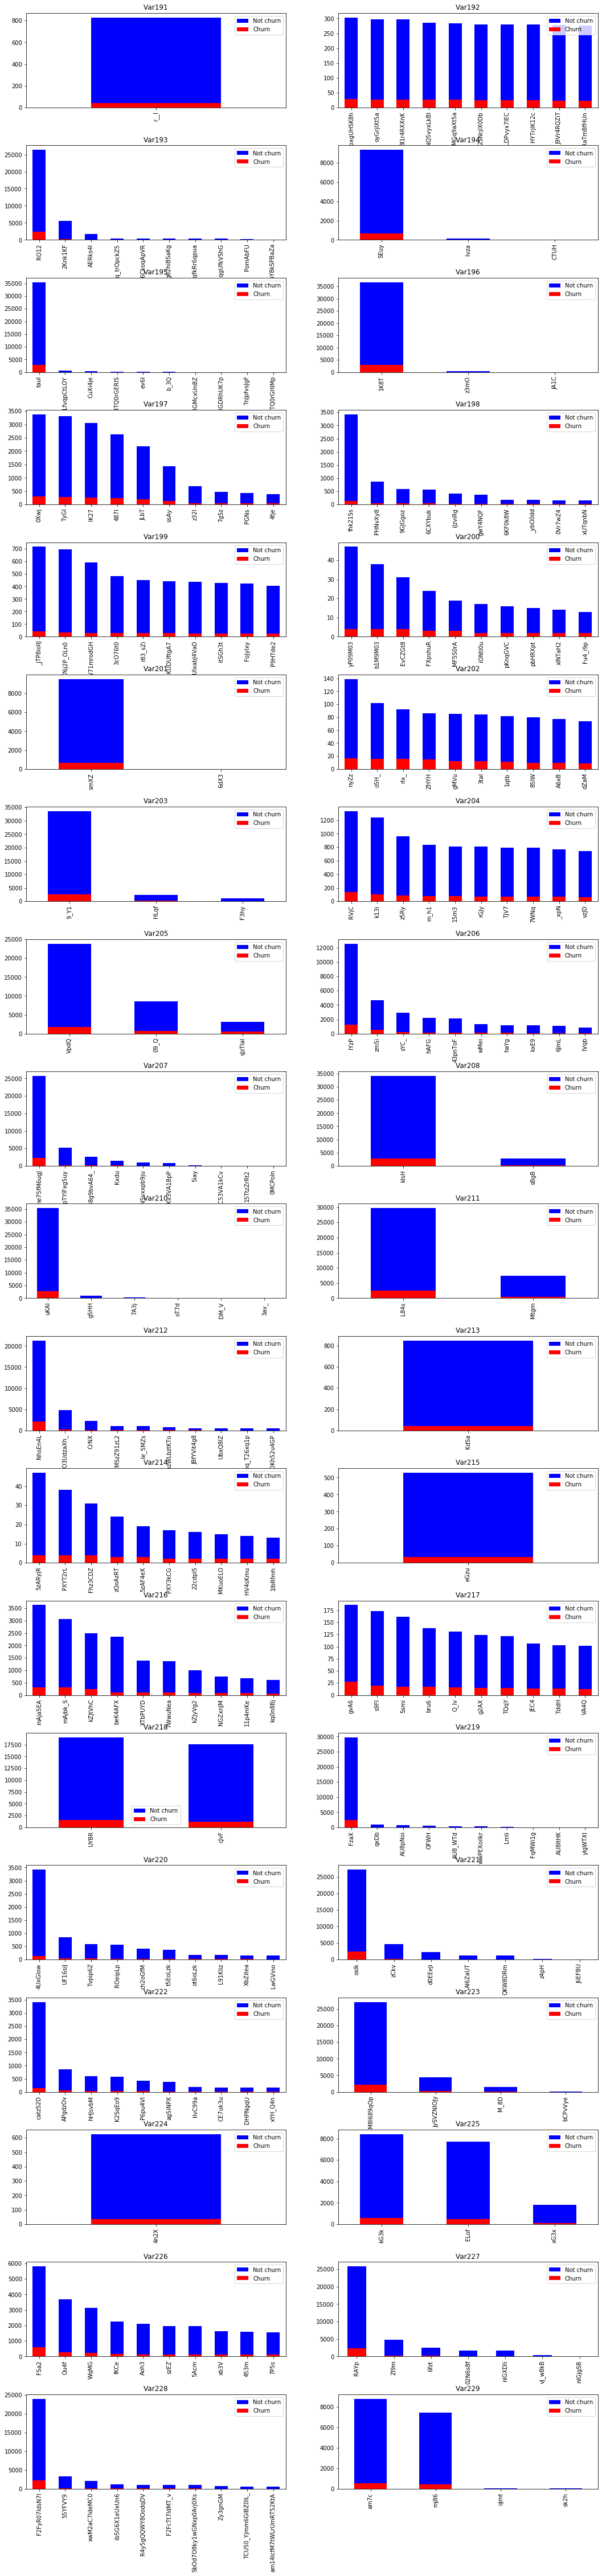

In [12]:
cat_columns = [col for col in X.columns if X[col].dtype == 'object']

fig, axs = plt.subplots(19, 2)
fig.set_figheight(80)
fig.set_figwidth(18)
fig.subplots_adjust(hspace=0.4)

for ax, column in zip(axs.flatten(), cat_columns):
    ax.set_title(column)
    X[y['churn'] == -1][column].value_counts()[:10].plot(kind='bar', ax=ax, color='blue')
    X[y['churn'] == 1][column].value_counts()[:10].plot(kind='bar', ax=ax, color='red')
    ax.legend(['Not churn', 'Churn'])

In [13]:
len(X[y['churn'] == -1]['Var1'].dropna()), len(X[y['churn'] == 1]['Var1'].dropna())

(535, 35)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

* Средние значения переменных в подвыборке churn меньше, чем в подвыборке not_churn для большинства переменных независимо от коэффициента корреляции Пирсона. Это еще раз подтверждает бесполезность корреляции Пирсона между вещественным и категориальным признаком.
* Наибольшее влияние на модель окажут те переменные, для которых видна разница в распределении в разных подвыборках. На прмер: Var131, Var54, Var19, Var41, Var137.
* Совершенно точно можно удалить переменные, принимающие только одно значение (Var191, Var213, Var215, Var224). Так-же, незначимыми могут оказаться переменные с одинаковым распределением значений в разных подвыборках: Var126, Var73.
* Думаю, что отбор признаков может оказаться полезным, т.к. модель будем строить на основе XGBoost или RandomForest, а они чувствительны к количеству признаков. Линейные алгоритмы будут работать на этих данных не очень хорошо, т.к. очень много не нормально распределенных признаков. Однако, тот метод, которым мы отбирали признаки в этом задании – плох. Считаю, что лучше проводить статистические тесты для каждой пары признак-целевая переменная. Критерий Манна-Уитни подойдет, т.к. большинство признаков распределены ненормально.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y['churn'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32000, 212), (8000, 212), (32000, 1), (8000, 1))

In [16]:
import os

os.mkdir('data')
X_train.to_csv('data/X_train.csv')
X_test.to_csv('data/X_test.csv')
y_train.to_csv('data/y_train.csv')
y_test.to_csv('data/y_test.csv')

FileExistsError: [Errno 17] File exists: 'data'